In [1]:
# create test and training data sets

import pandas as pd 
import numpy as np 
import random

# decide upon the time period of interest for generating buy signals
# Assume you can sell at the lows and buy at highs for that day only
# Assume some transaction cost say 50 bps
def long_returns(df, numdays):
    df = df.copy()
#     df['buyret'] = (df.Low.shift(-numdays) / df.High - 1)*100
#     df['buyret'] = (df.low.shift(-numdays) / df.high - 1)*100
    df['buyret'] = (df.close.shift(-numdays) / df.close - 1)*100
    
    df.buyret.fillna(0, inplace=True)
    return df

# decide upon the time period of interest for generating sell signals
# Assume you can sell at the lows and buy at highs only
# Assume some transaction cost say 50 bps
def short_returns(df, numdays):
    df = df.copy()
#     df['sellret'] = (df.Low / df.High.shift(-numdays) -1)*100
#     df['sellret'] = (df.low / df.high.shift(-numdays) -1)*100
    df['sellret'] = (df.close / df.close.shift(-numdays) -1)*100
    df.sellret.fillna(0,inplace=True)
    return df

def label_data(df):
    df = df.copy()
    df['Action'] = 'None'
    df.loc[df['buyret'] > 0.5, 'Action'] = 'Buy'
    df.loc[df['sellret'] > 0.5, 'Action'] = 'Sell'
#     df = df[df.columns.drop(['buyret','sellret'])]
    return df

# flexible function for computing moving average values
# normalise with variable that has the highest value
def moving_avg_data_normalised(df, mavnames, mavdays):
    df = df.copy()
    if(len(mavnames) != len(mavdays)):
        print('Variable Names and Number of days must match')
        return
    
    for i in range(0,len(mavnames)):
        df[mavnames[i]] = df.close.rolling(window = mavdays[i]).mean()

    maxmovavg = mavnames[mavdays.index(max(mavdays))]
    mavnames.remove(maxmovavg)

    for i in range(0,len(mavnames)):
        df[mavnames[i]] = df[mavnames[i]] / df[maxmovavg]

    df.loc[:,maxmovavg] = 1
    df = df.drop(df.index[:max(mavdays)])
    return df

In [2]:
test = pd.read_csv('Data/csvdata1/BTC_price.csv')

In [3]:
test

,time,close,high,low,open,volumefrom,volumeto
0,1/2/2013,13.28,13.40,13.16,13.30,17966.81,2.391562e+05
1,1/3/2013,13.40,13.46,13.25,13.28,18032.25,2.408459e+05
2,1/4/2013,13.50,13.52,13.27,13.40,29641.92,3.978843e+05
3,1/5/2013,13.44,13.55,13.31,13.50,21329.93,2.869325e+05
4,1/6/2013,13.45,13.52,13.36,13.44,12741.13,1.714970e+05
...,...,...,...,...,...,...,...
2638,3/23/2020,6503.53,6614.56,5703.64,5828.15,107692.99,6.679194e+08
2639,3/24/2020,6767.18,6857.49,6406.64,6503.53,105151.69,7.004445e+08
2640,3/25/2020,6694.21,6980.29,6483.00,6767.18,84721.04,5.662642e+08
2641,3/26/2020,6757.95,6796.12,6539.61,6694.21,45203.66,3.021211e+08


In [4]:
test2 = moving_avg_data_normalised(test, ['mavg20','mavg50'], [20, 50])
test2

,time,close,high,low,open,volumefrom,volumeto,mavg20,mavg50
50,2/21/2013,29.75,29.98,29.31,29.65,34730.51,1.030861e+06,1.269637,1
51,2/22/2013,30.25,31.30,29.67,29.75,66951.69,2.039412e+06,1.274858,1
52,2/23/2013,29.80,30.69,28.00,30.25,72278.17,2.099763e+06,1.277094,1
53,2/24/2013,29.89,30.40,29.20,29.80,24274.89,7.229405e+05,1.279683,1
54,2/25/2013,30.40,30.40,29.55,29.89,26778.95,8.052705e+05,1.282392,1
...,...,...,...,...,...,...,...,...,...
2638,3/23/2020,6503.53,6614.56,5703.64,5828.15,107692.99,6.679194e+08,0.801757,1
2639,3/24/2020,6767.18,6857.49,6406.64,6503.53,105151.69,7.004445e+08,0.794630,1
2640,3/25/2020,6694.21,6980.29,6483.00,6767.18,84721.04,5.662642e+08,0.785095,1
2641,3/26/2020,6757.95,6796.12,6539.61,6694.21,45203.66,3.021211e+08,0.776017,1


In [5]:

temp = pd.read_csv('Data/csvdata1/BTC_price.csv')
temp = temp[['time', 'close', 'high', 'low', 'open', 'volumefrom', 'volumeto']]

mavnames = ['mav5', 'mav10','mav20','mav30','mav50','mav100','mav200']
mavdays = [5,10,20,30,50,100,200]

fwdRet = 15
temp = long_returns(temp, fwdRet)
temp = short_returns(temp, fwdRet)
temp = label_data(temp)
temp = moving_avg_data_normalised(temp, mavnames, mavdays)
temp['symbolid'] = 'BTC'
temp = temp[['time','symbolid','buyret','sellret','Action','mav5', 'mav10','mav20','mav30','mav50','mav100']]
temp = temp.dropna()


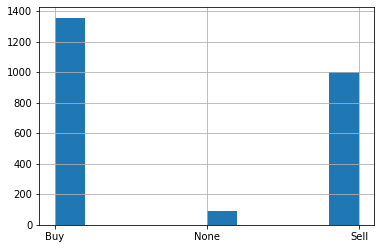

In [6]:
temp['Action'].hist()

In [7]:
temp.to_csv('Data/sampledata/train_BTC.csv')

In [8]:
temp

,time,symbolid,buyret,sellret,Action,mav5,mav10,mav20,mav30,mav50,mav100
200,7/21/2013,BTC,16.000000,-13.793103,Buy,1.181092,1.207056,1.110356,1.167013,1.259849,1.395923
201,7/22/2013,BTC,16.331878,-14.039039,Buy,1.157686,1.198021,1.105595,1.154183,1.245735,1.388809
202,7/23/2013,BTC,10.914609,-9.840551,Buy,1.165562,1.188318,1.110398,1.142995,1.232907,1.382308
203,7/24/2013,BTC,8.371017,-7.724406,Buy,1.167350,1.183059,1.114160,1.134192,1.219958,1.376807
204,7/25/2013,BTC,6.034038,-5.690661,Buy,1.179094,1.174452,1.126138,1.125607,1.207342,1.373192
...,...,...,...,...,...,...,...,...,...,...,...
2638,3/23/2020,BTC,0.000000,0.000000,None,0.736807,0.682188,0.807604,0.896150,1.007293,0.981078
2639,3/24/2020,BTC,0.000000,0.000000,None,0.752271,0.702561,0.797332,0.885268,1.003401,0.982717
2640,3/25/2020,BTC,0.000000,0.000000,None,0.765656,0.720161,0.784899,0.875432,0.999751,0.984707
2641,3/26/2020,BTC,0.000000,0.000000,None,0.780831,0.742288,0.772216,0.867127,0.995102,0.987017
